In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import yfinance as yf

import matplotlib.pyplot as plt
import plotly.express as px
import pytz  # Make sure to import pytz for timezone handling
import seaborn as sns

from sklearn.preprocessing import StandardScaler, Normalizer

In [2]:
sp500_etf_dict = {
    'Consumer_Discretionary': 'XLY'
    ,'Consumer_Staples': 'XLP'
    ,'Energy': 'XLE'
    ,'Financial': 'XLF'
    ,'Health Care': 'XLV'
    ,'Industrial': 'XLI'
    ,'Material': 'XLB'
    ,'Technology': 'XLK'
    ,'Utilities': 'XLU'
    ,'SP_500': 'SPY'
}

In [3]:

# Periods to fetch the data for
periods = [
    'now'
    ,'5d'
    ,'30d'
    ,'90d'
    ,'180d'
    ,'1y'
    ,'3y'
    ,'5y'
    ,'10y'
    ,'15y'
    ,'20y'
    ,'25y'
    ,'30y'
           ]

# Calculate the start date for the earliest period (20 years ago), making it timezone-aware
start_date = (datetime.now(pytz.UTC) - timedelta(days=365*30)).strftime('%Y-%m-%d')

# DataFrame to store the results
df_closing_prices = pd.DataFrame(index=sp500_etf_dict.keys(), columns=periods)

# Function to get the closing price for specific periods
def get_historical_closing_prices(ticker, start_date):
    etf = yf.Ticker(ticker)
    hist = etf.history(start=start_date)
    return hist['Close']


def find_nearest_date(target_date, dates_list):
    """
    Finds and returns the date from dates_list that is closest to target_date.

    Parameters:
    - target_date: The target datetime object you're trying to find the closest match for.
    - dates_list: A list of datetime objects to search within.

    Returns:
    - closest_date: The date from dates_list that is closest to the target_date.
    """


    date_diff_dict = dict(
                        zip(
                            [abs(target_date - i).days for i in dates_list]
                            ,dates_list
                            )
                        )
    
    # Retrieve the value corresponding to the smallest key
    neaerest_date = date_diff_dict[min(date_diff_dict.keys())].strftime('%Y-%m-%d')

    return neaerest_date


# Fetch and process the data for each ETF
for sector, ticker in sp500_etf_dict.items():
    closing_prices = get_historical_closing_prices(ticker, start_date)
    for period in periods:
        if period == 'now':
            # Get the most recent closing price
            period_date = closing_prices.index[-1]
        if period.endswith('d'):
            days = int(period[:-1])
            period_date = datetime.now(pytz.UTC) - timedelta(days=days)
        elif period.endswith('y'):
            years = int(period[:-1])
            period_date = datetime.now(pytz.UTC) - timedelta(days=365*years)
        # Find the closest date index to our target period_date
        period_date_str = period_date.strftime('%Y-%m-%d')
        if period_date_str in closing_prices.index.strftime('%Y-%m-%d'):
            closest_date = period_date_str
        else:
            closest_date = find_nearest_date(period_date, closing_prices.index)
        # Store the corresponding closing price
        df_closing_prices.at[sector, period] = round(closing_prices.loc[closest_date], 4)
        df_closing_prices['ticker'] = sp500_etf_dict.values()

# Display the DataFrame
df_closing_prices


e:\Python\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
e:\Python\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
e:\Python\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
e:\Python\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(ds

,now,5d,30d,90d,180d,1y,3y,5y,10y,15y,20y,25y,30y,ticker
Consumer_Discretionary,198.17,197.87,182.0244,189.6287,177.8397,159.4713,178.0894,113.3308,57.499,23.0894,24.5219,20.2267,18.9951,XLY
Consumer_Staples,81.47,82.02,82.5513,76.6527,73.3633,64.9064,64.7422,53.2224,34.9665,17.3616,12.8563,13.0835,14.5586,XLP
Energy,93.18,90.72,85.3055,88.033,96.2164,85.643,50.4265,43.8701,55.9551,34.8707,20.2906,14.0033,12.0341,XLE
Financial,45.65,45.13,44.13,41.5991,40.5816,32.5265,36.9077,24.4806,15.1314,9.5344,15.6043,10.8076,11.4255,XLF
Health Care,151.64,152.9,153.3779,144.4114,140.5133,128.4271,121.1056,81.47,53.5361,22.4768,20.1096,18.0722,17.2331,XLV
Industrial,135.51,135.26,125.4826,120.4489,123.265,100.8146,96.1834,68.7534,41.8079,19.874,19.2683,17.6869,14.7454,XLI
Material,95.17,95.77,89.4906,86.8723,90.7705,76.5625,76.3298,50.3524,37.8052,22.8477,17.6051,13.7367,11.7768,XLB
Technology,225.29,221.89,203.5544,233.8599,203.9851,167.8432,148.1345,76.2449,33.4769,17.0455,14.8242,30.6583,24.0644,XLK
Utilities,81.31,81.47,75.3991,68.3568,63.8688,55.9773,59.0078,54.792,30.9324,17.4394,12.7823,12.1649,12.1818,XLU
SP_500,572.98,568.86,538.7076,554.1204,510.8996,426.5223,418.9824,269.6268,159.7401,81.5735,76.8993,81.7532,27.4589,SPY


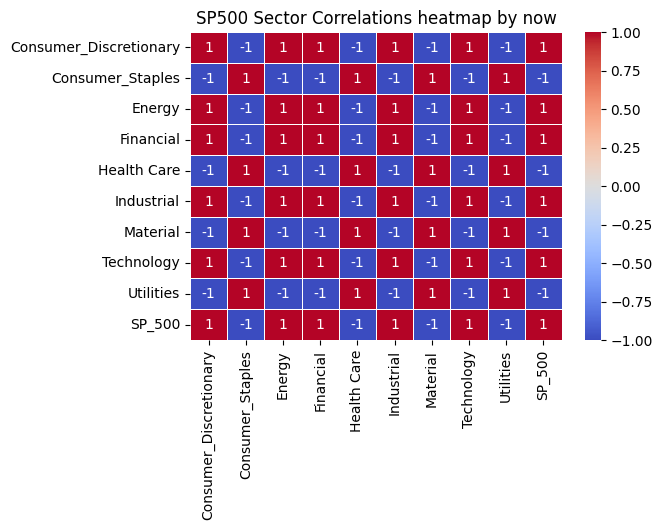

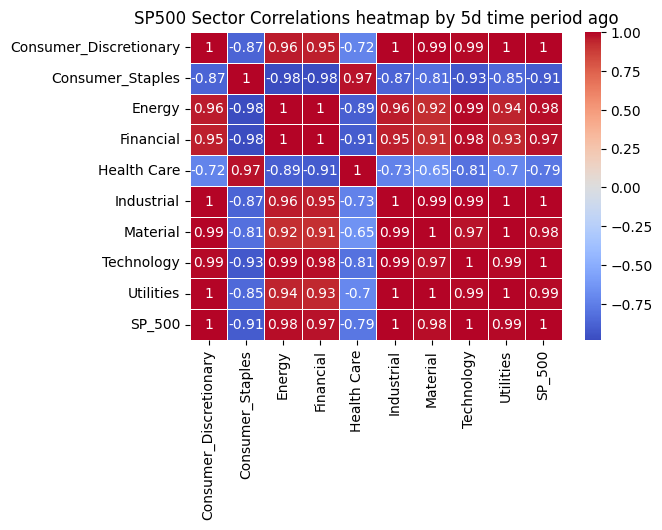

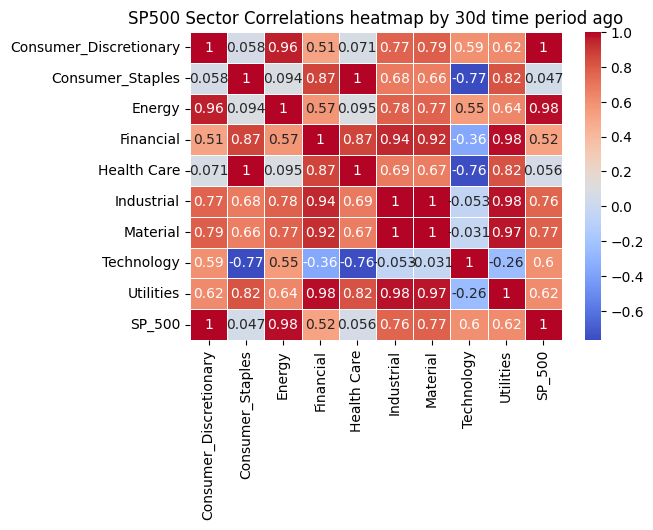

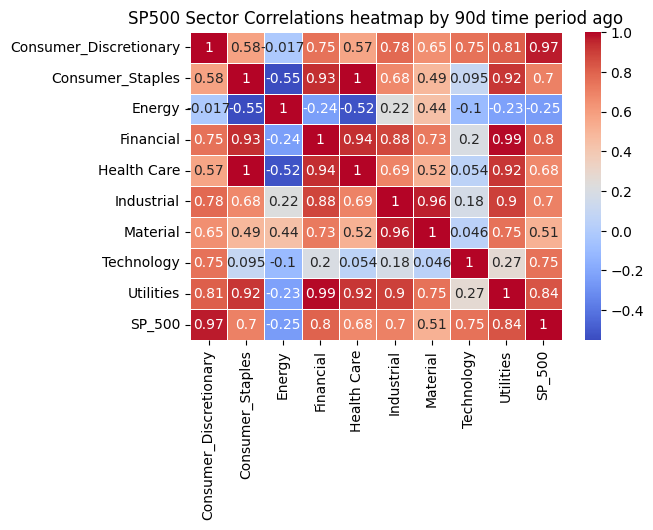

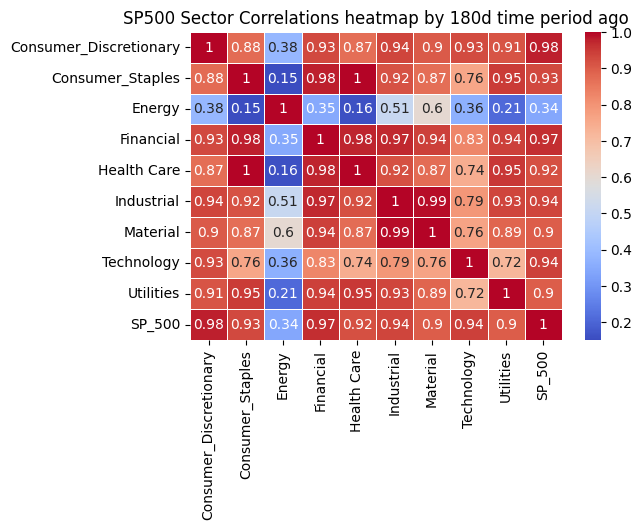

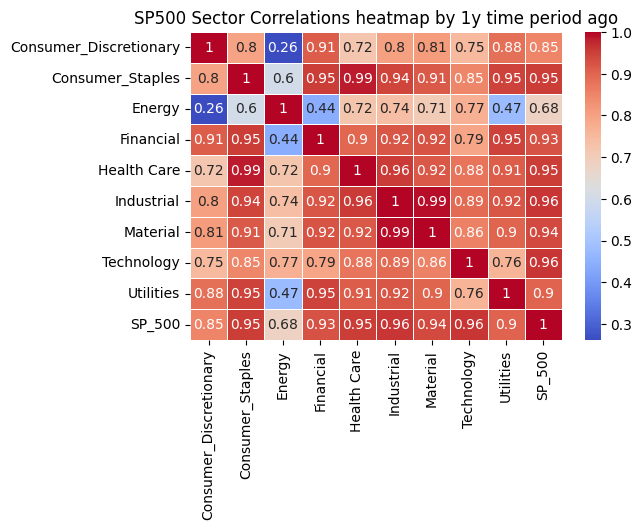

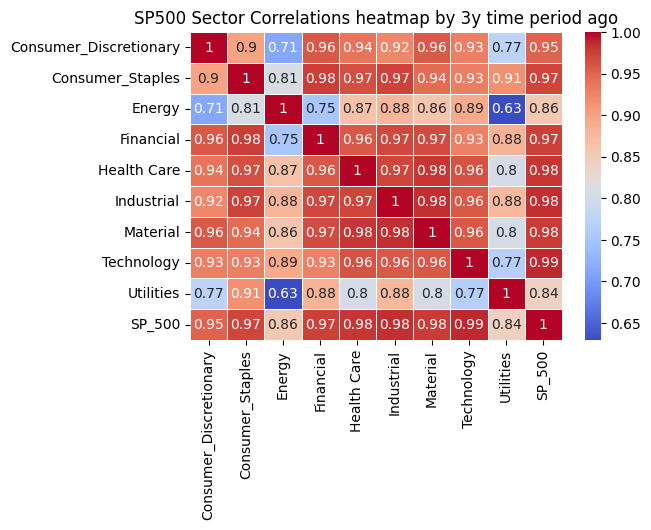

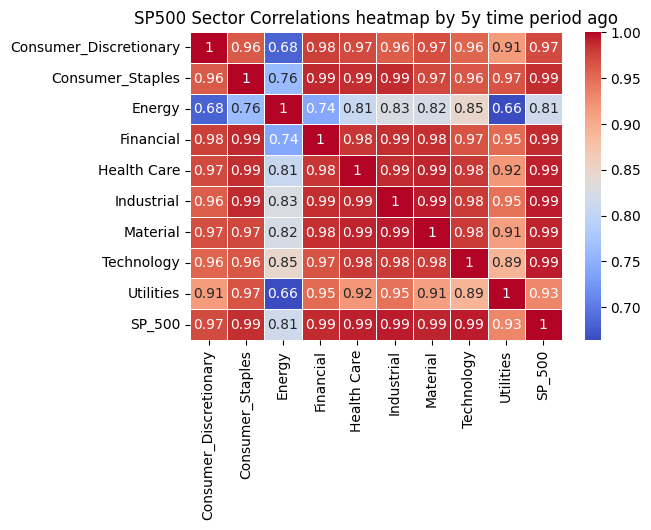

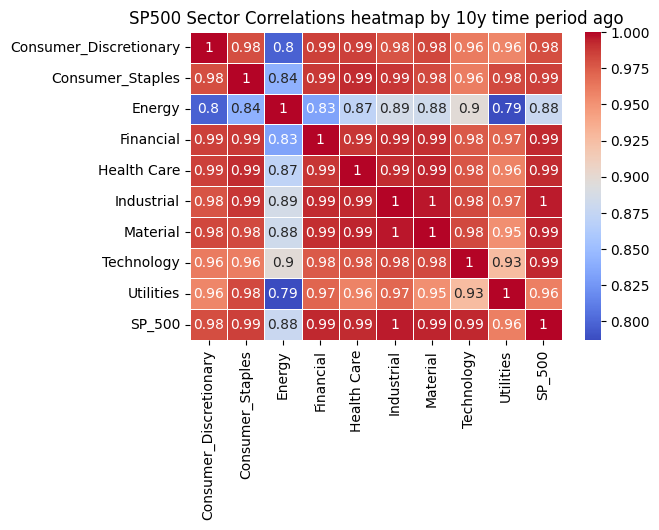

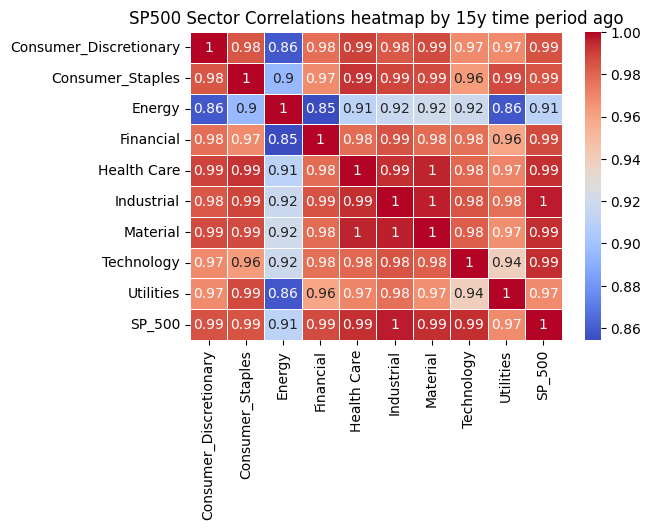

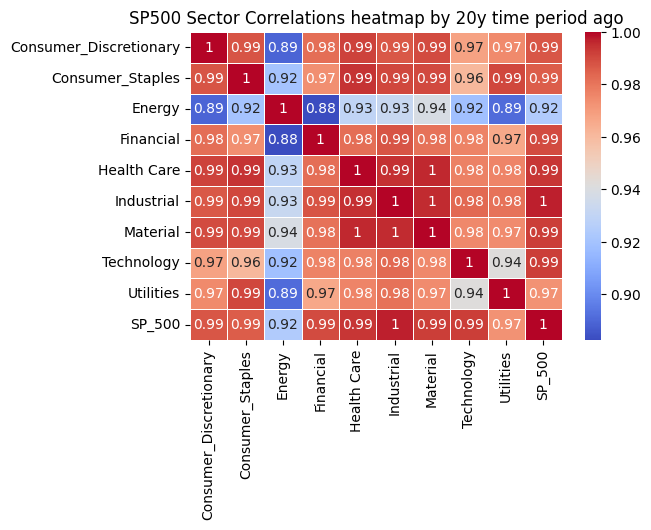

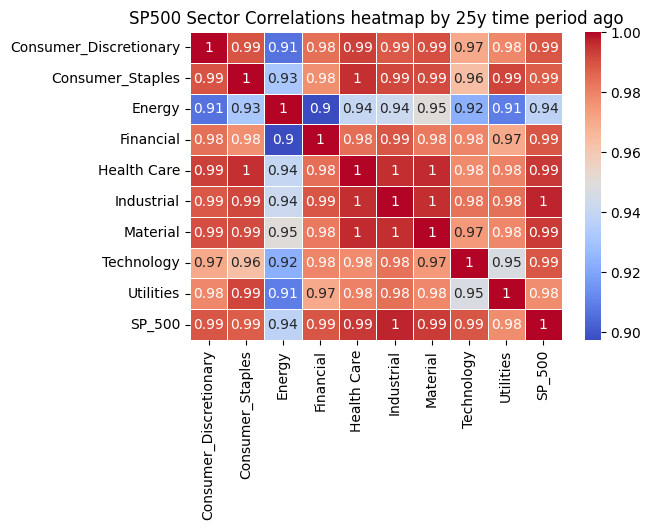

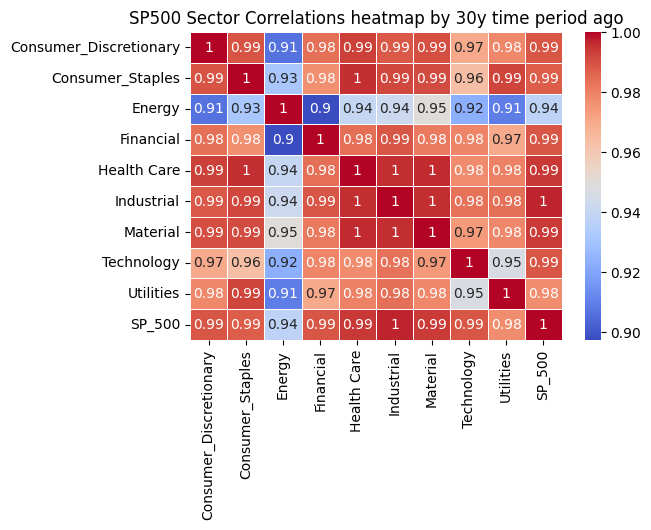

In [4]:
df_closing_prices_sub = df_closing_prices.iloc[:,0:-1].transpose()

# Initialize the StandardScaler
std_scaler = StandardScaler()
norm_scaler = Normalizer()

scaled_data = std_scaler.fit_transform(df_closing_prices_sub)
df_scaled = pd.DataFrame(scaled_data, columns=df_closing_prices_sub.columns, index=df_closing_prices_sub.index)


for index, value in enumerate(df_scaled.index): # need +1 for to include the last row of year
    corr_matrix = df_scaled.iloc[0:index+2,:].corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
    if value.endswith('d'):
        plt.title(f"SP500 Sector Correlations heatmap by {value} time period ago")
    elif value.endswith('y'):
        plt.title(f"SP500 Sector Correlations heatmap by {value} time period ago")
    else:
        plt.title(f"SP500 Sector Correlations heatmap by {value}")
    plt.show()

In [35]:
import yfinance as yf
import pandas as pd

# Define the S&P 500 sector ETFs
sector_etfs = ['XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLK', 'XLB', 'XLU']

# Fetch historical data for these ETFs
data = yf.download(sector_etfs, start='2020-01-01', end='2023-01-01')['Adj Close']

# Calculate the correlation matrix
correlation_matrix = data.corr()

data


[*********************100%%**********************]  9 of 9 completed


Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2020-01-02,55.635201,49.796810,28.506966,77.295654,89.714981,55.870945,55.675900,95.468811,122.339493
2020-01-03,54.736980,49.648849,28.204285,77.146660,88.706306,55.781517,55.789322,94.636856,121.298393
2020-01-06,54.498665,50.035183,28.185940,77.174583,88.917648,55.897762,55.841679,95.225784,121.635796
2020-01-07,54.434505,49.903667,28.002501,77.016304,88.879227,55.468533,55.763153,95.038826,121.442978
2020-01-08,54.626991,49.081661,28.185940,77.277016,89.830269,55.674210,55.736977,95.655777,121.809296
...,...,...,...,...,...,...,...,...,...
2022-12-23,76.612686,83.303070,33.191849,96.374954,123.325043,72.702698,68.059471,133.382904,128.040115
2022-12-27,76.680992,84.192932,33.182072,96.668823,122.157127,73.050842,68.481773,133.039902,125.962677
2022-12-28,75.510139,82.307945,33.064754,95.405243,120.187492,72.141800,67.829117,132.177444,124.904167
